In [194]:
import pandas as pd
import re
import string
import matplotlib
import nltk
#from nltk import stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
  
# importing all necessery modules for word clouds
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/karinahou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [195]:
yelp_reviews = pd.read_csv("Capstone2/Data/yelp_review.csv")

In [196]:
yelp_reviews.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [ ]:
#Group Stars into 3 levels

#np.where = if else (1,2 -->1)

In [197]:
yelp_reviews_equal = pd.DataFrame()

for x in range(6):
    star_reviews = yelp_reviews.loc[(yelp_reviews['stars']== x)]
    star_reviews = star_reviews.head(50000)
    yelp_reviews_equal = yelp_reviews_equal.append(star_reviews)
    

In [198]:
print(len(yelp_reviews_equal))

250000


In [199]:
yelp_reviews_equal = yelp_reviews_equal[yelp_reviews_equal.stars != 3]

In [200]:
print(len(yelp_reviews_equal))

200000


In [ ]:
'''
yelp_reviews_binary_2 = pd.DataFrame()

for i in [x for x in range(6) if x != 3]:
    star_reviews = yelp_reviews.loc[(yelp_reviews['stars']== x)]
    star_reviews = star_reviews.head(80000)
    yelp_reviews_binary_2 = yelp_reviews_binary_2.append(star_reviews)
'''

In [ ]:
#len(yelp_reviews_binary_2)

In [ ]:
'''
yelp_reviews_binary_3 = pd.DataFrame()

xr = iter(range(6))
for i in xr:
    star_reviews = yelp_reviews.loc[(yelp_reviews['stars']== x)]
    star_reviews = star_reviews.head(80000)
    yelp_reviews_binary_3 = yelp_reviews_binary_3.append(star_reviews)
    if i == 3:
        next(xr)
'''

In [ ]:
#len(yelp_reviews_binary_3)

In [201]:
def conditions(s):
    if (s['stars'] == 5) or (s['stars'] == 4):
        return 'Good'
    else:
        return 'Bad'

In [202]:
yelp_reviews_equal['binary'] = yelp_reviews_equal.apply(conditions, axis=1)

In [ ]:
#del yelp_reviews, star_reviews

In [ ]:
#read review text reviews with only 5 star ratings for word cloud
'''
five_star_reviews = yelp_reviews_equal.loc[(yelp_reviews_equal['stars']==5)]
five_star_reviews = five_star_reviews.head(40000)

print(five_star_reviews.head())
'''

In [ ]:
#read review text reviews with only 1 star ratings for word cloud
'''
one_star_reviews = yelp_reviews_equal.loc[(yelp_reviews_equal['stars']==1)]
one_star_reviews = one_star_reviews.head(40000)
print(one_star_reviews.head())
print("1 Star Review Size", len(one_star_reviews))
'''

In [ ]:
# Python program to generate WordCloud 

#word cloud for 10k of 5 star reviews
'''  
#yelp_reviews_test = pd.read_csv("../Data/yelp_review.csv", nrows = 10000) 
wc_five_star_reviews = five_star_reviews.head(10000)
                                                                             
comment_words = ' '
stopwords = set(STOPWORDS) 
# iterate through the csv file 
for val in wc_five_star_reviews.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10,
                max_words = 100).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()
'''

In [ ]:
# Python program to generate WordCloud 

#word cloud for 10k of 1 star reviews
''' 
wc_one_star_reviews = one_star_reviews.head(10000)
                                                                             
comment_words = ' '
stopwords = set(STOPWORDS) 
# iterate through the csv file 
for val in wc_one_star_reviews.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10,
                max_words = 100).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()
'''


In [203]:
yelp_reviews_equal.text.head()

12    I thought Tidy's Flowers had a great reputatio...
16    I too have been trying to book an appt to use ...
19    really excited to hear of this restaurant comi...
23    Food is very bland - not authentic at all.\n\n...
31    If you have not yet tried Wasabi - don't bothe...
Name: text, dtype: object

In [204]:
#Removing punctuation from the reviews
#****use the same dataframe, take things out of memory**
yelp_reviews_equal['cleaned_text'] = yelp_reviews_equal['text'].str.replace('[^\w\s]','')

In [205]:
#making the review text all lowercase
yelp_reviews_equal['cleaned_text'] = yelp_reviews_equal['cleaned_text'].str.lower()

In [206]:
#removing all numbers from reviews
yelp_reviews_equal['cleaned_text'] = yelp_reviews_equal['cleaned_text'].str.replace(r'\d+', '')

In [207]:
#removing _ (underscores) from the review text
yelp_reviews_equal['cleaned_text'] = yelp_reviews_equal['cleaned_text'].str.replace('_', '')

In [208]:
#splitting each word into a list
yelp_reviews_equal['cleaned_text'] = yelp_reviews_equal['cleaned_text'].str.split()

In [209]:
yelp_reviews_equal['cleaned_text'].head()

12    [i, thought, tidys, flowers, had, a, great, re...
16    [i, too, have, been, trying, to, book, an, app...
19    [really, excited, to, hear, of, this, restaura...
23    [food, is, very, bland, not, authentic, at, al...
31    [if, you, have, not, yet, tried, wasabi, dont,...
Name: cleaned_text, dtype: object

In [210]:
#removing all stop words (and, but, then, etc)
stop = stopwords.words('english')
yelp_reviews_equal['cleaned_text'] = yelp_reviews_equal['cleaned_text'].apply(lambda x: [item for item in x if item not in stop])

In [ ]:
#stemmer = SnowballStemmer("english")
#yelp_reviews['cleaned_text'] = stop_words.apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

In [211]:
#lemmatize the text and take it out of the list
lemmatizer = WordNetLemmatizer()
yelp_reviews_equal['cleaned_text'] = yelp_reviews_equal['cleaned_text'].apply(lambda x:' '.join([lemmatizer.lemmatize(y) for y in x])) # Lemmatize every word.


In [212]:
yelp_reviews_equal['cleaned_text'].head()

12    thought tidy flower great reputation florist g...
16    trying book appt use voucher month countless p...
19    really excited hear restaurant coming toronto ...
23    food bland authentic meant cater customer neve...
31    yet tried wasabi dont bother expensive food di...
Name: cleaned_text, dtype: object

In [213]:
yelp_reviews_equal.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,binary,cleaned_text
12,x5oV6wm9_Pb1QQ6jkjDjwQ,u0LXt3Uea_GidxRW1xcsfg,13nKUHH-uEUXVZylgxchPA,1,2011-02-16,I thought Tidy's Flowers had a great reputatio...,9,0,1,Bad,thought tidy flower great reputation florist g...
16,FKu4iU62EmWT6GZXPJ2sgA,u0LXt3Uea_GidxRW1xcsfg,fdnNZMk1NP7ZhL-YMidMpw,1,2012-10-23,I too have been trying to book an appt to use ...,0,0,0,Bad,trying book appt use voucher month countless p...
19,WYDFJOBOl7cycd7gN-c_xA,u0LXt3Uea_GidxRW1xcsfg,zgQHtqX0gqMw1nlBZl2VnQ,1,2012-10-30,really excited to hear of this restaurant comi...,9,2,1,Bad,really excited hear restaurant coming toronto ...
23,ypjtMQLKdAwKGRS-KU7oxA,u0LXt3Uea_GidxRW1xcsfg,hjk3ox7w1akbEuOgTJ03Bw,1,2012-05-10,Food is very bland - not authentic at all.\n\n...,4,2,0,Bad,food bland authentic meant cater customer neve...
31,z9e32TaBomM5uY7fHYqYKg,u0LXt3Uea_GidxRW1xcsfg,I8rveLd-dl81u6c8YqAxmw,1,2012-05-11,If you have not yet tried Wasabi - don't bothe...,3,0,0,Bad,yet tried wasabi dont bother expensive food di...


In [214]:
#checking for null values
yelp_reviews_equal.isnull().sum()

review_id       0
user_id         0
business_id     0
stars           0
date            0
text            0
useful          0
funny           0
cool            0
binary          0
cleaned_text    0
dtype: int64

In [215]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#making a new dataframe with less rows for the sake of machine learning
'''
yelp_reviews_ml = pd.DataFrame()

for x in range(6):
    ml_reviews = yelp_reviews_equal.loc[(yelp_reviews_equal['stars']== x)]
    ml_reviews = ml_reviews.head(8000)
    yelp_reviews_ml = yelp_reviews_ml.append(ml_reviews)
'''
#print(len(yelp_reviews_ml))

In [216]:
#text_data = yelp_reviews_ml['cleaned_text']
text_data = yelp_reviews_equal['cleaned_text']

In [217]:
#use tokenizer as an argument, get feautre names, n-gram range =  1

#Use count vect
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(text_data)
print(count_vect.get_feature_names()[:10])
print(X_train_counts.shape)



['aa', 'aaa', 'aaaaa', 'aaaaaaaaaa', 'aaaaaaaaaaaaaand', 'aaaaaaaaaaaaahhhhhhh', 'aaaaaaaaaaand', 'aaaaaaaaand', 'aaaaaaaannnnd', 'aaaaaaahhhhhh']
(200000, 177841)


In [218]:
vec = TfidfVectorizer(stop_words="english")

#vec.fit(yelp_reviews.cleaned_text)
vec.fit(yelp_reviews_equal.cleaned_text.values.astype('U'))
features = vec.transform(yelp_reviews_equal.cleaned_text)

print(features[:1])

  (0, 173617)	0.112918494519092
  (0, 169411)	0.04246796704651981
  (0, 165084)	0.128205850357475
  (0, 164776)	0.4010242662663238
  (0, 162255)	0.0890543055982346
  (0, 156157)	0.2234521549510611
  (0, 155654)	0.05219887981430168
  (0, 151409)	0.04457196160060794
  (0, 150375)	0.07386191015658232
  (0, 147108)	0.11325278841893388
  (0, 144508)	0.08359629824613841
  (0, 141756)	0.0486409714089843
  (0, 140249)	0.07571227382805028
  (0, 139381)	0.1347679707669999
  (0, 139165)	0.06255199305440567
  (0, 132139)	0.04284867283474369
  (0, 130694)	0.37622995376061624
  (0, 127567)	0.13493325610453033
  (0, 127401)	0.09557374608476754
  (0, 125041)	0.06132110334412465
  (0, 124680)	0.0353924770691096
  (0, 116509)	0.0740525772855065
  (0, 116474)	0.02671893038556486
  (0, 109330)	0.12785781124099316
  (0, 108916)	0.12017096714387969
  :	:
  (0, 68293)	0.06708605754220266
  (0, 68286)	0.0740649720621714
  (0, 68050)	0.08920699958830912
  (0, 66497)	0.05990844581296841
  (0, 65496)	0.063233318

In [ ]:
#print(features.toarray())

In [ ]:
#print(yelp_reviews_ml.describe())

In [219]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(yelp_reviews_equal.cleaned_text)
print(X_tfidf.shape)


(200000, 177841)


In [220]:
print(tfidf_vect.get_feature_names()[:10])

['aa', 'aaa', 'aaaaa', 'aaaaaaaaaa', 'aaaaaaaaaaaaaand', 'aaaaaaaaaaaaahhhhhhh', 'aaaaaaaaaaand', 'aaaaaaaaand', 'aaaaaaaannnnd', 'aaaaaaahhhhhh']


In [ ]:
#test train split, use train in validation, fit model.
#best practice: apply best parameters on the 20% of validation test and compare accuracy
#applied before fitting (**train_test_split**)

In [221]:
X = X_train_counts
y = yelp_reviews_equal.binary

#Change so that 1&2, 3, 4&5

In [222]:
from sklearn import model_selection

In [223]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80,test_size=0.20, random_state=42)

In [224]:
#Random Forest for the test model

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
param = {'n_estimators': [1, 50 ,100],
        'max_depth': [1,10, 30],
        'min_samples_leaf': [1, 5],
        'max_features': ['sqrt', 'log2'],
        'min_samples_split': [2, 5]}
gs = GridSearchCV(rf, param, cv=5, scoring = 'accuracy')
gs_fit = gs.fit(X_train, y_train)


In [ ]:
#https://stackoverflow.com/questions/47882126/how-to-print-recall-and-accuracy-along-with-parameters-used-in-a-gridsearch-in-s

In [ ]:
#gs_fit.cv_results_

In [225]:
best_params = gs_fit.best_params_
print(best_params)

{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [226]:
print(gs_fit.best_score_)

0.84224375


In [227]:
y_pred = gs_fit.predict(X_test)

In [228]:
print(y_pred)

['Good' 'Bad' 'Good' ... 'Good' 'Good' 'Bad']


In [229]:
#gs_fit accuracy vs test_predict
#sikt learn accuracy & confusion matrix

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, y_pred)

0.842225

In [230]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[15656,  4337],
       [ 1974, 18033]])

In [231]:
import numpy as np

In [232]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

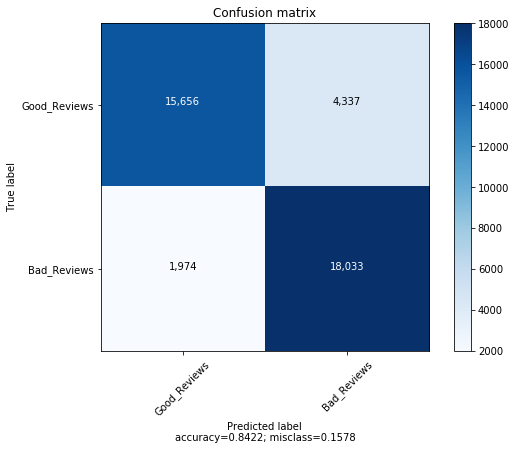

In [233]:
plot_confusion_matrix(cm, normalize = False, target_names = ['Good_Reviews','Bad_Reviews'])